<H2> Support Vector Machines (SVM)

In this notebook, I shall use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.



SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Load the Cancer data</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

In [1]:
# Import section

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

<H2> Load the Cancer cell data

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record. To download the data, we will use `!wget` to download it from IBM Object Storage.  

In [2]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-04-16 11:10:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

100%[======================================>] 20,675      --.-K/s   in 0.07s   

2020-04-16 11:10:04 (271 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [5]:
Cell_df = pd.read_csv("cell_samples.csv")

In [6]:
Cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
Cell_df.shape

(699, 11)

Let us first plot the data 

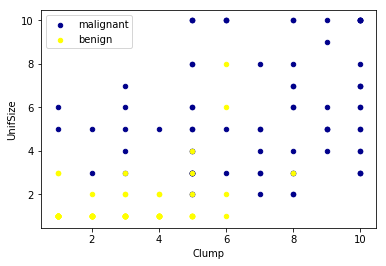

In [10]:
ax = Cell_df[Cell_df['Class'] == 4][0:80].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
Cell_df[Cell_df['Class'] == 2][0:80].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [11]:
Cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Some rows have BareNuc as non-numerice. Let us drop them.

In [14]:
Cell_df = Cell_df[pd.to_numeric(Cell_df['BareNuc'], errors='coerce').notnull()]

In [16]:
feature_df =Cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit' ]]
X=np.asarray(feature_df)


We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [21]:
Cell_df ['Class'] = Cell_df['Class'].astype('int') 
y= np.asarray (Cell_df ['Class'])

### Train/Test data set - Split the set into two 

In [22]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=4)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results.

In [25]:
from sklearn import svm

clf_Linear = svm.SVC(kernel='linear')
clf_Polynomial = svm.SVC(kernel='Polynomial')
clf_RBF = svm.SVC(kernel='rbf')
clf_Sigmoid = svm.SVC(kernel='sigmoid')


In [27]:
clf_Linear.fit(X_Train, y_Train)
#clf_Polynomial.fit(X_Train, y_Train)
clf_RBF.fit(X_Train, y_Train)
clf_Sigmoid.fit(X_Train, y_Train)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
yhat_Linear = clf_Linear.predict(X_Test)

yhat_RBF = clf_RBF.predict(X_Test)

yhat_Sigmoid = clf_Sigmoid.predict(X_Test)

## Evaluation

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [30]:
# Subroutine to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


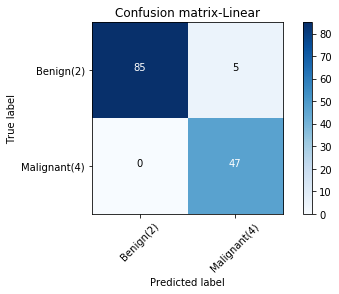

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_Test, yhat_Linear, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_Test, yhat_Linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix-Linear')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


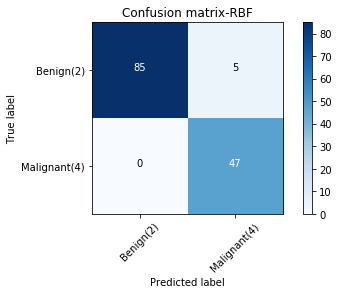

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_Test, yhat_RBF, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_Test, yhat_RBF))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix-RBF')

              precision    recall  f1-score   support

           2       0.49      0.51      0.50        90
           4       0.00      0.00      0.00        47

   micro avg       0.34      0.34      0.34       137
   macro avg       0.25      0.26      0.25       137
weighted avg       0.32      0.34      0.33       137

Confusion matrix, without normalization
[[46 44]
 [47  0]]


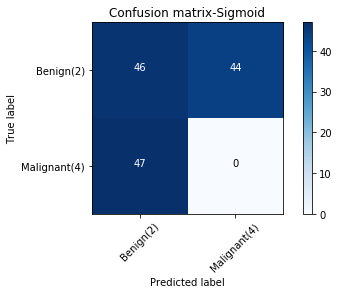

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_Test, yhat_Sigmoid, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_Test, yhat_Sigmoid))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix-Sigmoid')

#### So it seems that the Sigmoid model of SVM has failed miserably in predicting the True-Negative.
#### This will reflect in the f1 score as well as Jacquerred Index

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [39]:
f1_Linear = f1_score(y_Test, yhat_Linear, average='weighted') 
Jss_Linear = jaccard_similarity_score (y_Test, yhat_Linear)

In [40]:
f1_RBF = f1_score(y_Test, yhat_RBF, average='weighted') 
Jss_RBF = jaccard_similarity_score (y_Test, yhat_RBF)

In [41]:
f1_Sigmoid = f1_score(y_Test, yhat_Sigmoid, average='weighted') 
Jss_Sigmoid = jaccard_similarity_score (y_Test, yhat_Sigmoid)

In [43]:
Summary = pd.DataFrame(columns = ['Model', 'f1_Score', 'Jacquered Score'])

In [47]:
Summary = Summary.append({'Model': 'SVM-Linear', 'f1_Score': f1_Linear, 'Jacquered Score': Jss_Linear}, ignore_index=True)

In [48]:
Summary = Summary.append({'Model': 'SVM-RBF', 'f1_Score': f1_RBF, 'Jacquered Score': Jss_RBF}, ignore_index=True)
Summary = Summary.append({'Model': 'SVM-Sigmoid', 'f1_Score': f1_Sigmoid, 'Jacquered Score': Jss_Sigmoid}, ignore_index=True)

In [49]:
Summary

,Model,f1_Score,Jacquered Score
0,SVM-Linear,0.963904,0.963504
1,SVM-RBF,0.963904,0.963504
2,SVM-Sigmoid,0.330262,0.335766


## Conclusion
The SVM is functionaing identical for Linear and RBF. It is failing for Sigmoid